# K-Means Clustering Algorithm

Clustering is the process of dividing the dataset into the group,consisting
of similar data point.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\Machine Learning\data sets\datasets_42674_74935_Mall_Customers.csv")
df.head(10)             #Read the data using pandas

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()  #Null value is Zero

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

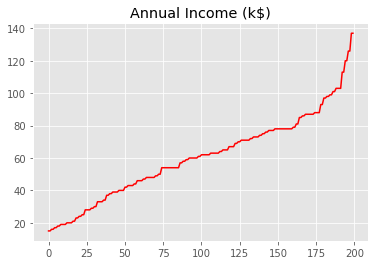

In [6]:
plt.style.use("ggplot")
plt.plot(df.iloc[:,3],color="red")
plt.title("Annual Income (k$)")
plt.show()

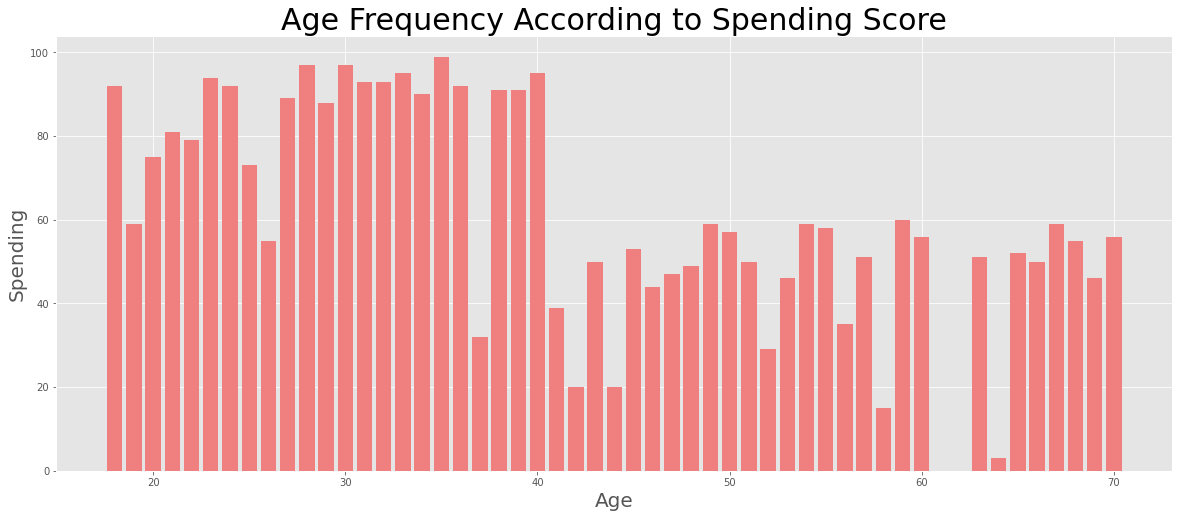

In [7]:
plt.figure(figsize=(20,8))
plt.bar(df.iloc[:,2],df.iloc[:,4],color="lightcoral")
plt.title("Age Frequency According to Spending Score",fontsize=30)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Spending",fontsize=20)
plt.show()

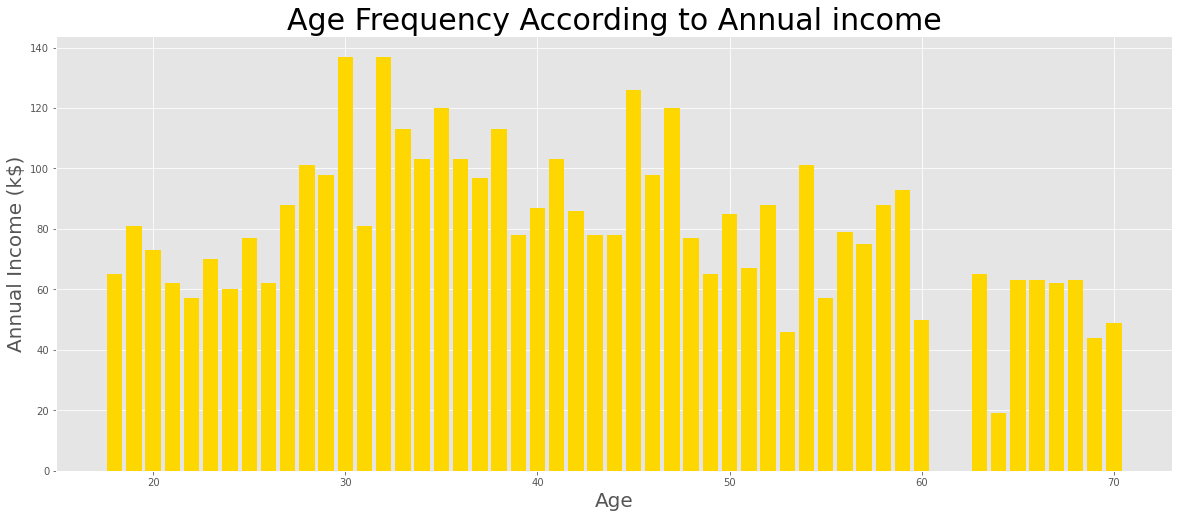

In [8]:
plt.figure(figsize=(20,8))
plt.bar(df.iloc[:,2],df.iloc[:,3],color="gold")
plt.title("Age Frequency According to Annual income",fontsize=30)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Annual Income (k$)",fontsize=20)
plt.show()

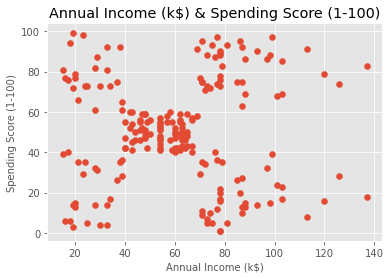

In [9]:
plt.scatter(df.iloc[:,3],df.iloc[:,4])
plt.title("Annual Income (k$) & Spending Score (1-100)")
plt.xlabel("Annual Income (k$)",fontsize=10)
plt.ylabel("Spending Score (1-100)",fontsize=10)
plt.show()

In [10]:
X = df.iloc[:,3:].values     #cluster data
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [137,  83]], dtype=int64)

In [11]:
clusters_list = []   #to find the number of cluster for the data
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
    ans = kmeans.fit(X)
    clusters_list.append(ans.inertia_) 
    
    
    #inertia_ is the formula used to segregate the data points into clusters(Variance)

In [12]:
clusters_list

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25018.576334776328,
 21850.16528258562,
 19664.68519600554,
 17602.190468386776,
 16115.21560663984,
 14600.443647385644,
 13450.080233818468,
 12038.745689262336,
 11116.622080860312,
 10229.45602453102,
 9517.59289044289,
 9038.027227603312]

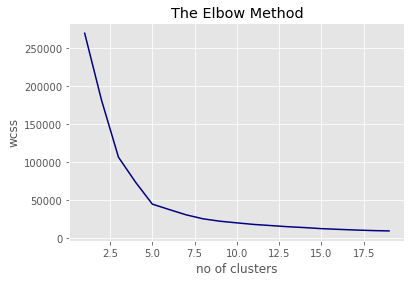

In [13]:
plt.plot(range(1,20),clusters_list,color="navy")  #Elbow point is the best cluster
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')     #With in cluster sum of square
plt.show()

In [14]:
model = KMeans(n_clusters=5,init="k-means++",random_state=0) #best cluster point is 5
k = model.fit_predict(X)

In [15]:
len(k)    #K define cluster group

200

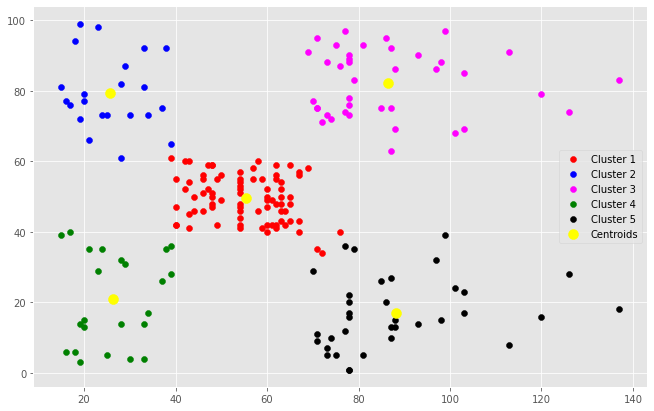

In [16]:
plt.figure(figsize=(11,7))
plt.scatter(X[k==0,0],X[k==0,1],c="red",label="Cluster 1")  #plot the cluster groups
plt.scatter(X[k==1,0],X[k==1,1],c="blue",label="Cluster 2")
plt.scatter(X[k==2,0],X[k==2,1],c="magenta",label="Cluster 3")
plt.scatter(X[k==3,0],X[k==3,1],c="green",label="Cluster 4")
plt.scatter(X[k==4,0],X[k==4,1],c="black",label="Cluster 5")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],s=100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [17]:
gg = pd.DataFrame(X)            #Creating Final data set
mm = pd.DataFrame(k)
gg = gg.rename(columns={0:"Annual Income (k$)",1:"Spending Score (1-100)"})
mm = mm.rename(columns={0:"cluster"})
final = pd.merge(gg,mm,"outer",left_index=True, right_index=True)
final                                                        

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4
